## **WORD EMBEDDING**

# 1. Install and Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2. Data Acquisition

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/KeN095/data-breaches-notebook/main/data_breaches.csv')
data.head(20)

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]
5,5,Advocate Medical Group,2017,4000000,healthcare,lost / stolen media,[13][14]
6,6,AerServ (subsidiary of InMobi),2018,75000,advertising,hacked,[15]
7,7,"Affinity Health Plan, Inc.",2013,344579,healthcare,lost / stolen media,[16][17]
8,8,Airtel,2019,320000000,telecommunications,poor security,[18]
9,9,Air Canada,2018,20000,transport,hacked,[19]


# 3. Text Preprocessing

In [5]:
import re

def text_preprocessing(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[-+]?[0-9]+', '', text)
    text = re.sub(r'[^\w\s]','', text)
    text = text.strip()
    return text

In [10]:
%time data['clean_teks'] = data['Entity'].apply(text_preprocessing)

CPU times: user 4.85 ms, sys: 826 µs, total: 5.68 ms
Wall time: 5.65 ms


In [11]:
data.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources,clean_teks
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6],st century oncology
1,1,500px,2020,14870304,social networking,hacked,[7],px
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9],accendo insurance co
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10],adobe systems incorporated
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12],adobe inc


# 4. Word Embedding

Word2Vec

In [12]:
import gensim

gensim.__version__

'4.3.2'

### 4.1 Tokenisasi

In [13]:
ef tokenization(text):
    text = re.split('\W+', text)
    return text

sentences = data['clean_teks'].apply(lambda x: tokenization(x.lower()))
sentences

0                                [st, century, oncology]
1                                                   [px]
2                               [accendo, insurance, co]
3                         [adobe, systems, incorporated]
4                                           [adobe, inc]
                             ...                        
347                                              [zynga]
348    [unknown, agencybelieved, to, be, tied, to, un...
349    [national, health, information, center, nczi, ...
350           [companies, and, government, institutions]
351                                               [ikea]
Name: clean_teks, Length: 352, dtype: object

### 4.2 Konfigurasi Parameter

In [14]:
EMBEDDING_SIZE = 100
WINDOW_SIZE = 5
MIN_WORD  = 1
EPOCH = 10
SG = 1
NEGATIVE = 5

In [15]:
%%time

from gensim.models import Word2Vec, FastText, KeyedVectors

model_word2vec = Word2Vec(sentences, vector_size=EMBEDDING_SIZE, sg=SG, min_count=MIN_WORD, window=WINDOW_SIZE, negative=NEGATIVE, epochs=EPOCH)

CPU times: user 39 ms, sys: 8.16 ms, total: 47.2 ms
Wall time: 53 ms


In [16]:
model_word2vec.save('myvec-word2vec-100.model')

In [17]:
word2vec_word_vectors = model_word2vec.wv
word2vec_word_vectors.save('myvec-word2vec-100.wordvectors')

In [21]:
model_word2vec.wv['insurance']

array([ 3.9189882e-04,  2.9639455e-03, -7.6468070e-03, -5.7224701e-03,
        1.5439820e-03, -6.3827285e-03,  5.8387490e-03,  6.5045999e-03,
        7.7190679e-03,  6.7995172e-03, -1.2831960e-03, -4.8048971e-03,
       -6.7527122e-03,  9.9093430e-03, -8.7038527e-04,  2.7932960e-03,
       -7.7232942e-03, -1.8231192e-03,  2.7251763e-03,  6.7930594e-03,
        3.7689174e-03, -4.6878094e-03,  7.5875684e-03,  9.1973990e-03,
       -2.6802771e-04,  7.4216109e-03,  4.7395597e-03,  9.7832642e-03,
        5.5799614e-05,  4.3919315e-03,  3.4512861e-03, -4.1673747e-03,
       -4.4362885e-03,  6.2035010e-03, -7.5377016e-03, -4.1086227e-03,
       -9.5625753e-03, -1.6163493e-03,  1.6152862e-03,  3.5582192e-03,
       -5.1299919e-04, -8.5242968e-03,  5.5546197e-03,  8.0936775e-03,
       -2.1868853e-03,  8.9403195e-03,  8.2700010e-03,  8.8392701e-03,
       -1.4413018e-03,  7.2877547e-03,  2.0075254e-03,  1.0206054e-03,
        9.6381716e-03, -5.2186586e-03, -6.2366971e-03, -8.8544786e-03,
      

In [22]:
model_word2vec.wv.most_similar('insurance')

[('reserve', 0.25076887011528015),
 ('amazon', 0.24858585000038147),
 ('tumblr', 0.24821628630161285),
 ('caltex', 0.23534013330936432),
 ('college', 0.23046192526817322),
 ('guy', 0.22881074249744415),
 ('gap', 0.22595565021038055),
 ('university', 0.21603532135486603),
 ('formspring', 0.2152075171470642),
 ('sandwich', 0.20444275438785553)]

In [28]:
word_list = ['system','incorporated','government','companies','health','national','unknown','information']

word_vectors = np.array([model_word2vec.wv[w] for w in word_list])
print(word_vectors)

[[-8.59771098e-04 -4.96499613e-03  9.36870836e-03  3.37950257e-03
   4.48498828e-03  5.59133478e-03  8.50892067e-03 -4.44512861e-03
  -6.39701728e-03 -3.65496194e-03 -4.18859022e-03 -9.94005427e-03
  -7.58120208e-04 -8.26613419e-03  9.82433371e-03 -3.99337057e-03
  -6.33867551e-03 -8.66215583e-03 -3.75536107e-03 -1.02497106e-02
   1.09595479e-03  5.75801404e-03 -2.67010042e-03  7.79015804e-03
  -2.10812245e-03 -7.03599583e-03 -3.55084613e-03 -3.42763052e-03
  -7.59856403e-03 -9.76847671e-03 -3.76531226e-03 -1.05163478e-03
   4.94236825e-03 -8.06843303e-03 -5.22866379e-03  1.87849894e-03
  -1.69531279e-03  3.33195925e-03 -1.88894011e-03  3.61709436e-03
   8.16268474e-03 -8.30783322e-03  3.73498257e-03  5.64240059e-03
  -6.34076423e-04  6.52216049e-03 -5.68700768e-03 -4.71974630e-03
  -7.52688060e-03  9.80317872e-03 -9.19795502e-03 -3.72049259e-03
  -6.94718328e-04 -4.82635526e-03  8.92928522e-03 -7.03363726e-03
  -7.61908572e-03  9.33881942e-03 -8.94959737e-03  9.47221182e-03
  -4.16115

In [29]:
# Reduksi dimensi vektor ke 2D menggunakan PCA
from sklearn.decomposition import PCA, KernelPCA

dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [30]:
# Lihat vektor hasil PCA (dari 5 dimensi menjadi 2 dimensi)
red_word_vectors

array([[ 1.5792558 , -0.22254874],
       [-0.9438787 ,  1.3590413 ],
       [-1.2836584 , -0.7791045 ],
       [-0.29129   , -1.3501232 ],
       [ 0.34367442, -0.4202732 ],
       [-0.33244702,  1.3879585 ],
       [-0.3177699 , -0.52145535],
       [ 1.2461134 ,  0.5465051 ]], dtype=float32)

In [31]:
def plot(datas, labels, fc='yellow'):
    # plot the dots
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(datas[:, 0], datas[:, 1], marker='o')

    # annotate labels
    for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
        plt.annotate(label, \
                    xy=(x, y), xytext=(-15, 15), \
                    textcoords='offset points', ha='right', va='bottom', \
                    bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
                    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.show()

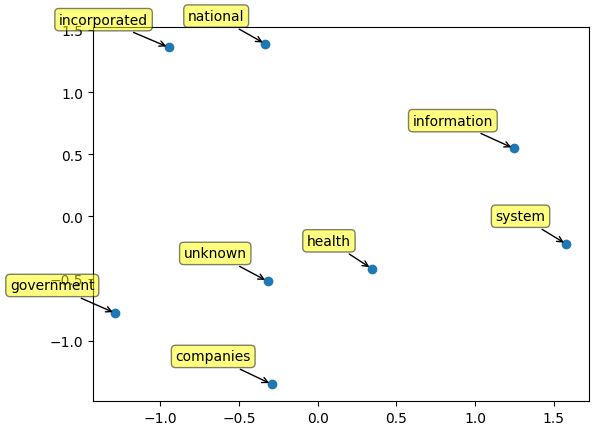

In [32]:
plot(red_word_vectors, word_list)